In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [126]:
# load csv
df = pd.read_csv('StudentsPerformance.csv',sep=';')

# print head
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none        72.0           72.0             74  
1               completed        69.0           90.0             88  
2                    none        90.0           95.0             93  
3                    none        47.0           57.0             44  
4                    none        76.0           78.0             75  


In [127]:
# print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       998 non-null    object 
 1   race/ethnicity               996 non-null    object 
 2   parental level of education  996 non-null    object 
 3   lunch                        998 non-null    object 
 4   test preparation course      996 non-null    object 
 5   math score                   998 non-null    float64
 6   reading score                999 non-null    float64
 7   writing score                1000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [128]:
# print jumlah null per kolom
df.isnull().sum()

gender                         2
race/ethnicity                 4
parental level of education    4
lunch                          2
test preparation course        4
math score                     2
reading score                  1
writing score                  0
dtype: int64

In [129]:
# get unique value

print(df['gender'].unique())

print(df['race/ethnicity'].unique())

print(df['parental level of education'].unique())

print(df['lunch'].unique())

print(df['test preparation course'].unique())

['female' 'male' 'perempuan' nan]
['group B' 'group C' 'group A' 'group D' 'group E' nan]
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
['standard' 'free/reduced' nan]
['none' 'completed' 'komplit' nan]


In [130]:
# fill empty data number
dfNew = df.fillna(df.mean(numeric_only=True))

dfNew.isnull().sum()


gender                         2
race/ethnicity                 4
parental level of education    4
lunch                          2
test preparation course        4
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [131]:
# change non standart column

dfNew['gender'] = dfNew['gender'].replace('perempuan','female')
dfNew['parental level of education'] = dfNew['parental level of education'].replace('some high school','high school')
print(dfNew['gender'].unique())
print(dfNew['parental level of education'].unique())

['female' 'male' nan]
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' nan]


In [132]:
# drop non standart label

gender = ['female','male']
race = ['group B', 'group C', 'group A', 'group D', 'group E']
education = ["bachelor's degree", "master's degree", "associate's degree", 'high school']
lunch = ['standard', 'free/reduced']
test = ['none', 'completed', 'komplit']

dfNew = dfNew[dfNew['gender'].isin(gender)]
dfNew = dfNew[dfNew['race/ethnicity'].isin(race)]
dfNew = dfNew[dfNew['parental level of education'].isin(education)]
dfNew = dfNew[dfNew['lunch'].isin(lunch)]
dfNew = dfNew[dfNew['test preparation course'].isin(test)]

print(dfNew['gender'].unique())
print(dfNew['parental level of education'].unique())

print(dfNew['race/ethnicity'].unique())

print(dfNew['lunch'].unique())

print(dfNew['test preparation course'].unique())

dfNew.isnull().sum()

['female' 'male']
["bachelor's degree" "master's degree" "associate's degree" 'high school']
['group B' 'group A' 'group D' 'group C' 'group E']
['standard' 'free/reduced']
['none' 'completed' 'komplit']


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [133]:
# cek skor
dfNew.describe()

,math score,reading score,writing score
count,761.000000,761.000000,761.000000
mean,65.747882,69.122409,67.759527
std,15.391541,14.788314,15.509971
min,0.000000,17.000000,-1.000000
25%,55.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,101.000000,100.000000


In [134]:
# mengganti nilai < 0 dengan 0 di kolom writing score
# dfNew[dfNew['writing score'] < 0] = 0

# # mengganti nilai > 100 dengan 100 di kolom reading score
# dfNew[dfNew['reading score'] > 100] = 100

# dfNew.describe()

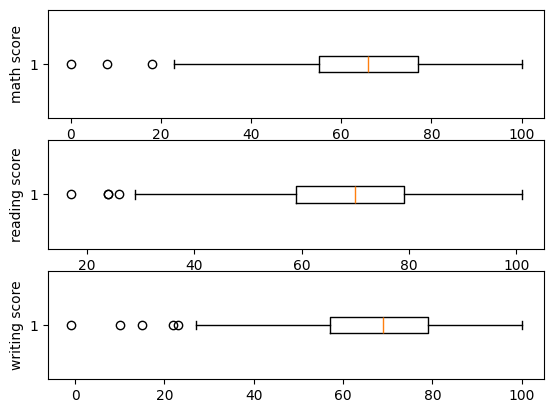

In [135]:
fig, axs = plt.subplots(3,1)

# print(fig)
i=0

# print(df.select_dtypes(include=np.number).columns)

for col in dfNew.select_dtypes(include=np.number).columns:
    # if
    # print(col,i,df[col])
    axs[i].boxplot(dfNew[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1

plt.show()

In [136]:
# menghilangkan outlier

q1, q3 = np.percentile(dfNew['math score'],[25,75])

iqr = q3 - q1 

toleransi = 1.5 * iqr

lowerBound = q1 - toleransi
upperBound = q3 + toleransi

dfNew = dfNew[(dfNew['math score'] >= lowerBound) & (dfNew['math score'] <= upperBound)]

dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 758 entries, 0 to 997
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       758 non-null    object 
 1   race/ethnicity               758 non-null    object 
 2   parental level of education  758 non-null    object 
 3   lunch                        758 non-null    object 
 4   test preparation course      758 non-null    object 
 5   math score                   758 non-null    float64
 6   reading score                758 non-null    float64
 7   writing score                758 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 53.3+ KB


In [137]:
q1, q3 = np.percentile(dfNew['reading score'],[25,75])

iqr = q3 - q1 

toleransi = 1.5 * iqr

lowerBound = q1 - toleransi
upperBound = q3 + toleransi

dfNew = dfNew[(dfNew['reading score'] >= lowerBound) & (dfNew['reading score'] <= upperBound)]

dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 997
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       756 non-null    object 
 1   race/ethnicity               756 non-null    object 
 2   parental level of education  756 non-null    object 
 3   lunch                        756 non-null    object 
 4   test preparation course      756 non-null    object 
 5   math score                   756 non-null    float64
 6   reading score                756 non-null    float64
 7   writing score                756 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 53.2+ KB


In [138]:
q1, q3 = np.percentile(dfNew['writing score'],[25,75])

iqr = q3 - q1 

toleransi = 1.5 * iqr

lowerBound = q1 - toleransi
upperBound = q3 + toleransi

dfNew = dfNew[(dfNew['writing score'] >= lowerBound) & (dfNew['writing score'] <= upperBound)]

dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 997
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       755 non-null    object 
 1   race/ethnicity               755 non-null    object 
 2   parental level of education  755 non-null    object 
 3   lunch                        755 non-null    object 
 4   test preparation course      755 non-null    object 
 5   math score                   755 non-null    float64
 6   reading score                755 non-null    float64
 7   writing score                755 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 53.1+ KB


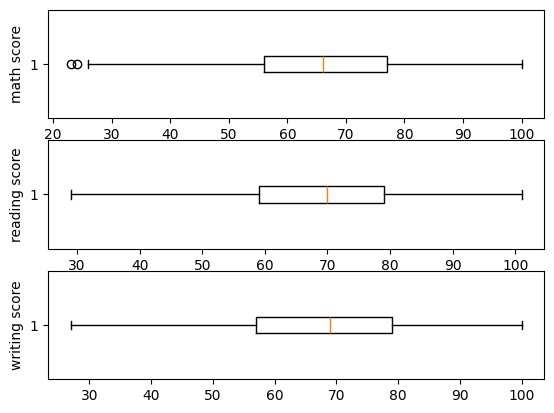

In [139]:
# cek hasil menghilangkan outlier
fig, axs = plt.subplots(3,1)

# print(fig)
i=0

# print(df.select_dtypes(include=np.number).columns)

for col in dfNew.select_dtypes(include=np.number).columns:
    # if
    # print(col,i,df[col])
    axs[i].boxplot(dfNew[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1

plt.show()

# dfNew.describe()

In [140]:
# convert string to category 

print(dfNew['gender'].unique())
print(dfNew['race/ethnicity'].unique())
print(dfNew['parental level of education'].unique())
print(dfNew['lunch'].unique())
print(dfNew['test preparation course'].unique())

dfNew['gender'] = dfNew['gender'].astype('category').cat.codes
dfNew['race/ethnicity'] = dfNew['race/ethnicity'].astype('category').cat.codes
dfNew['parental level of education'] = dfNew['parental level of education'].astype('category').cat.codes
dfNew['lunch'] = dfNew['lunch'].astype('category').cat.codes
dfNew['test preparation course'] = dfNew['test preparation course'].astype('category').cat.codes

print(dfNew['gender'].unique())
print(dfNew['race/ethnicity'].unique())
print(dfNew['parental level of education'].unique())
print(dfNew['lunch'].unique())
print(dfNew['test preparation course'].unique())

['female' 'male']
['group B' 'group A' 'group D' 'group C' 'group E']
["bachelor's degree" "master's degree" "associate's degree" 'high school']
['standard' 'free/reduced']
['none' 'completed' 'komplit']
[0 1]
[1 0 3 2 4]
[1 3 0 2]
[1 0]
[2 0 1]


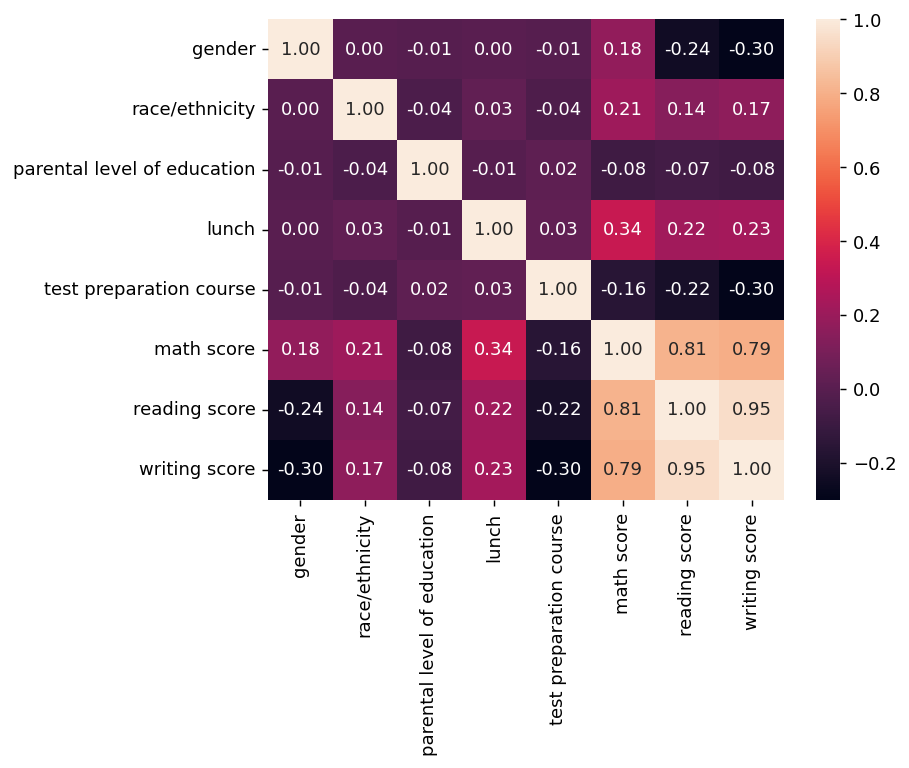

In [141]:
# math

# corr = dfNew[['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score']].corr()
corr = dfNew.corr()

plt.figure(dpi=130)

sns.heatmap(corr,annot=True,fmt='.2f')

plt.show()

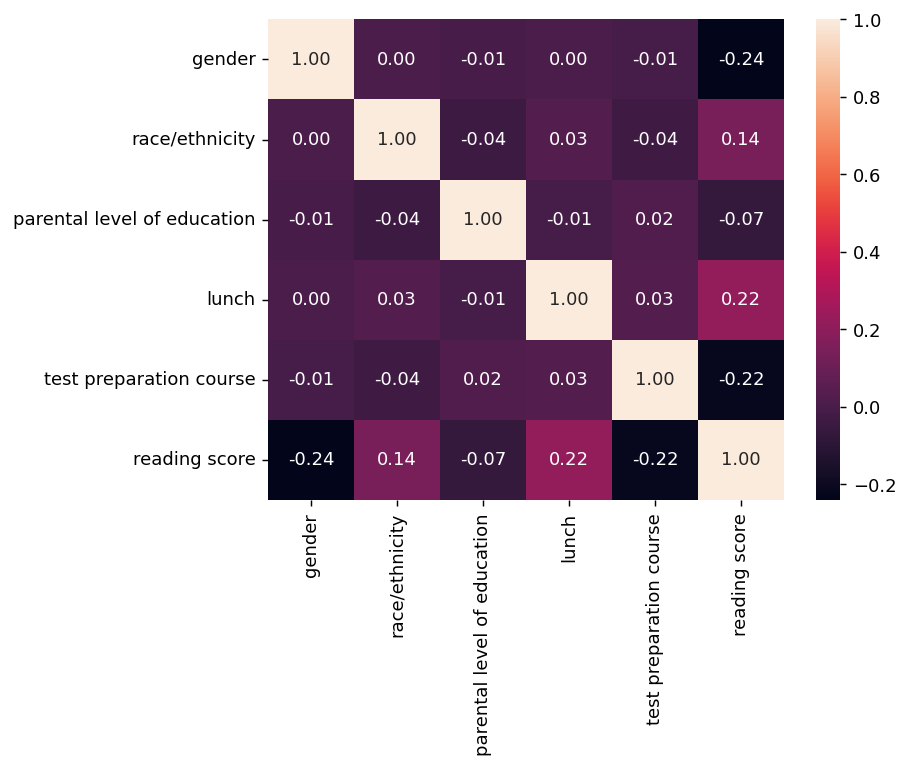

In [142]:
# reading
corr = dfNew[['gender','race/ethnicity','parental level of education','lunch','test preparation course','reading score']].corr()
# corr = dfNew.corr()
# print(corr)
plt.figure(dpi=130)

sns.heatmap(corr,annot=True,fmt='.2f')

plt.show()

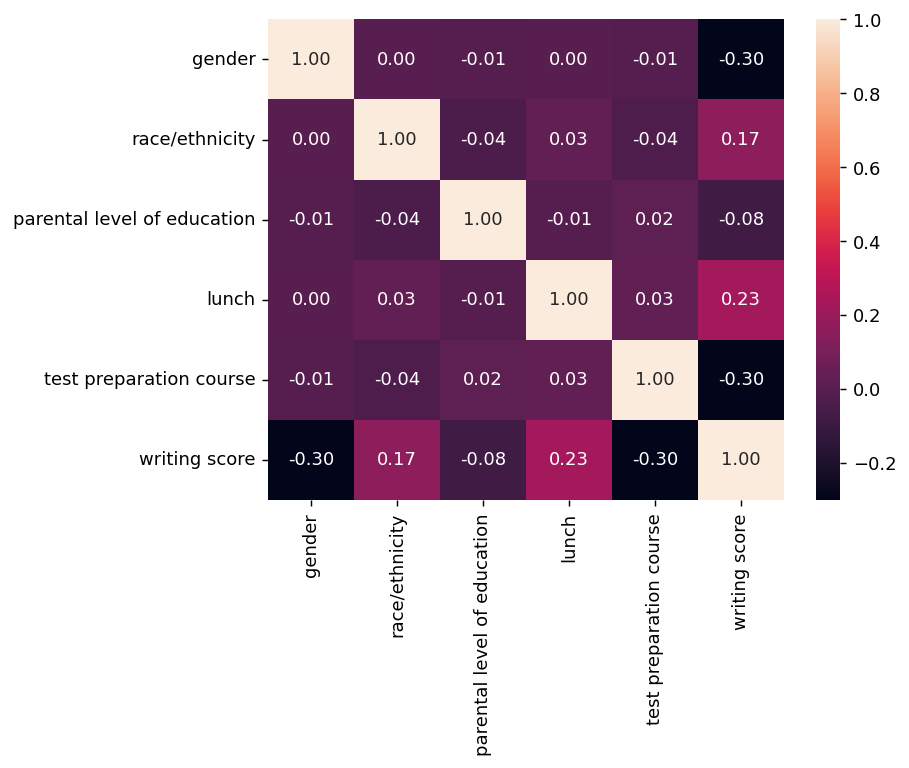

In [143]:
# writing
corr = dfNew[['gender','race/ethnicity','parental level of education','lunch','test preparation course','writing score']].corr()
# corr = dfNew.corr()
# print(corr)
plt.figure(dpi=130)

sns.heatmap(corr,annot=True,fmt='.2f')

plt.show()

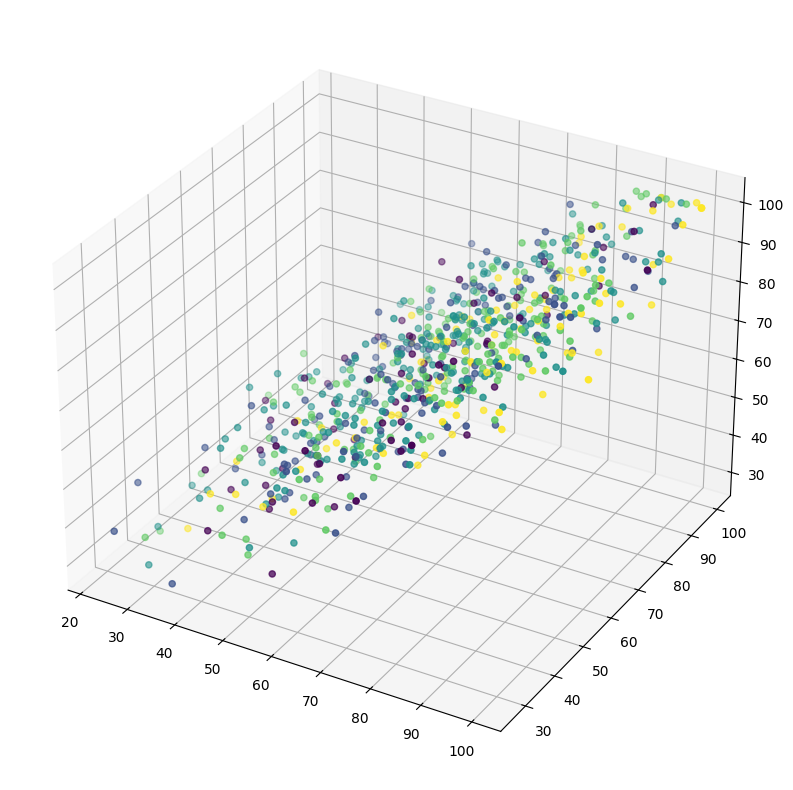

In [144]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(dfNew['math score'], dfNew['writing score'], dfNew['reading score'], c=dfNew['race/ethnicity'])
plt.show()

[1 0]


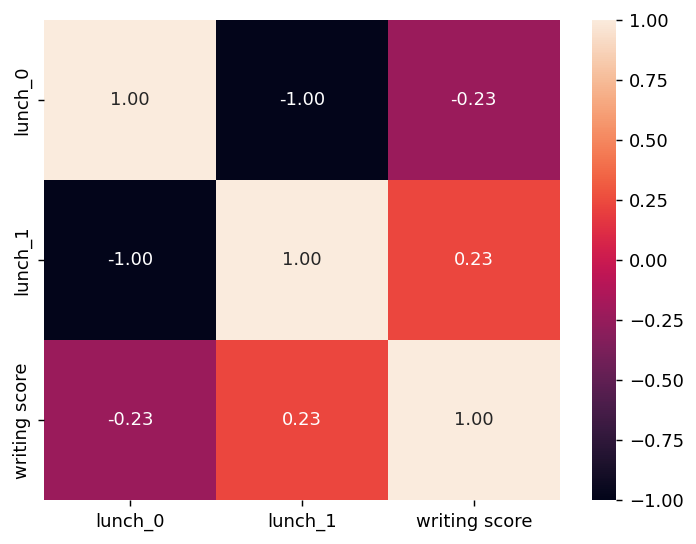

In [145]:
dfEncoded = pd.get_dummies(dfNew,columns=['lunch'])

# print(dfEncoded.head())

print(dfNew['lunch'].unique())

corr = dfEncoded[['lunch_0','lunch_1','writing score']].corr()
# corr = dfNew.corr()
# print(corr)
plt.figure(dpi=130)

sns.heatmap(corr,annot=True,fmt='.2f')

plt.show()

In [146]:
dfNew.describe()

dfNew['rata'] = (dfNew['math score'] + dfNew['reading score'] + dfNew['writing score']) / 3

print(dfNew)

     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
2         0               1                            3      1   
3         1               0                            0      0   
5         0               1                            0      1   
8         1               3                            2      0   
..      ...             ...                          ...    ...   
993       0               3                            1      0   
994       1               0                            2      1   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   

     test preparation course  math score  reading score  writing score  \
0                          2        72.0           72.0             74   
2                          2        90.0       

[1 0]


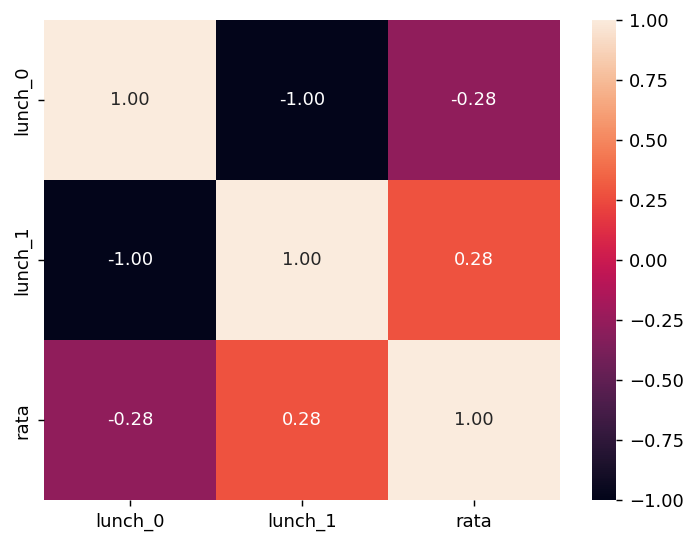

In [147]:
dfEncoded = pd.get_dummies(dfNew,columns=['lunch'])

# print(dfEncoded.head())

print(dfNew['lunch'].unique())

corr = dfEncoded[['lunch_0','lunch_1','rata']].corr()
# corr = dfNew.corr()
# print(corr)
plt.figure(dpi=130)

sns.heatmap(corr,annot=True,fmt='.2f')

plt.show()

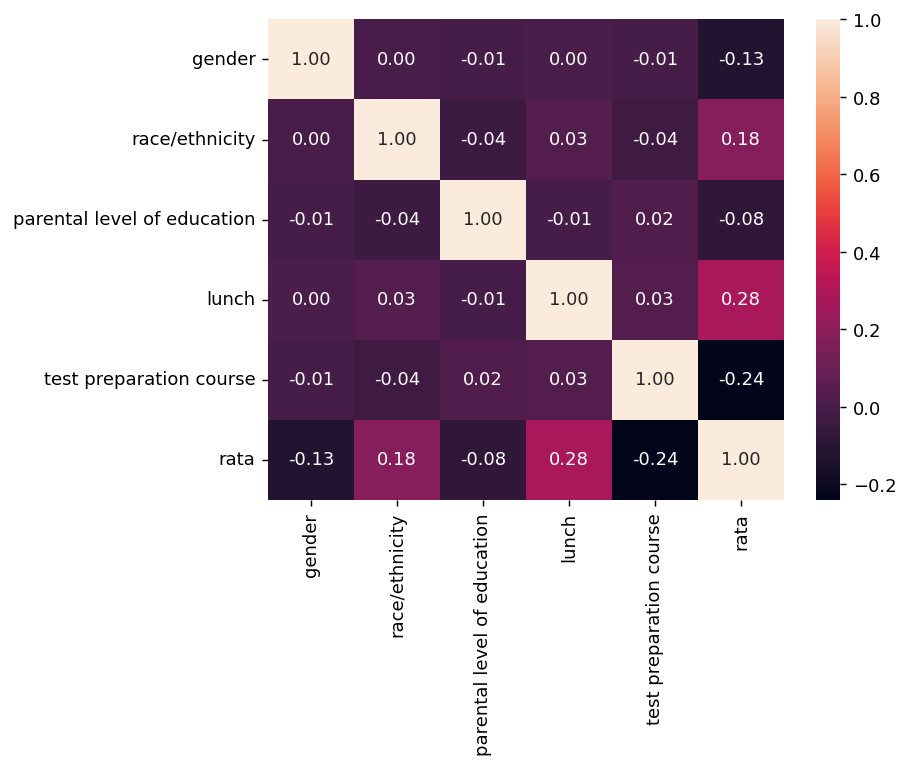

In [148]:
# writing
corr = dfNew[['gender','race/ethnicity','parental level of education','lunch','test preparation course','rata']].corr()
# corr = dfNew.corr()
# print(corr)
plt.figure(dpi=130)

sns.heatmap(corr,annot=True,fmt='.2f')

plt.show()